Processing windows (Extracting features): 100%|██████████| 4422/4422 [00:04<00:00, 887.93it/s]


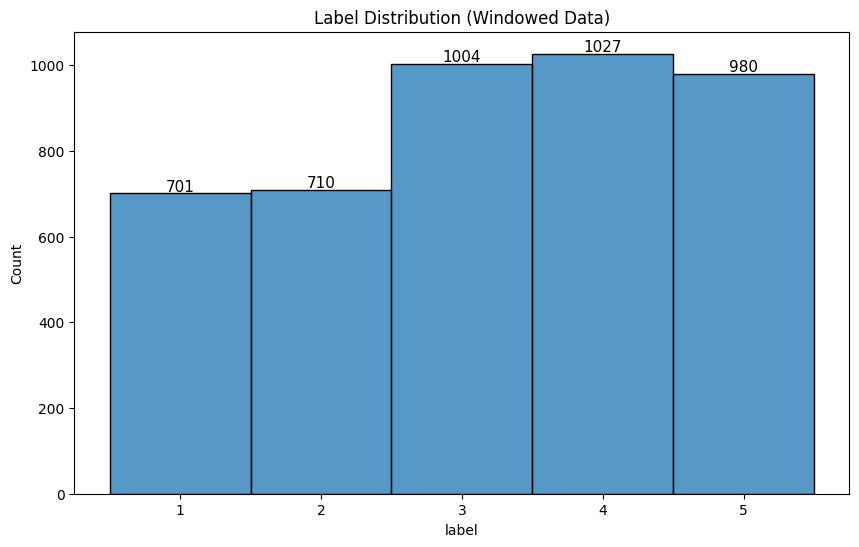

In [8]:
from BoxingRecognition.util import DataUtility

# Load data
df = DataUtility.get_feature_df(DataUtility.get_aggregate_df(drop_unlabeled_data=True, sessions=[1,2,3,4,5,6]), window_size=50, overlap_size=25,drop_window_id=True)

In [9]:
from sklearn.model_selection import train_test_split

# Set the random state
rng = 404

# Get features and labels (x and y)
x = df.drop(columns='label')
y = df['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rng, stratify=y)

# Show information about the training and test sets
print(f'Training set: {x_train.shape[0]} samples (windows)')
print(f'Test set: {x_test.shape[0]} samples (windows)')

Training set: 3095 samples (windows)
Test set: 1327 samples (windows)


In [10]:
from sklearn import svm

# Train the model
model = svm.SVC(kernel='linear')
model = model.fit(x_train, y_train)

In [11]:
from BoxingRecognition.util import EvaluationUtility

# Print the classification report
EvaluationUtility.print_model_classification_report(fitted_model=model, x_test=x_test, y_test=y_test)

              precision    recall  f1-score   support

         1.0       0.91      0.90      0.90       211
         2.0       0.90      0.92      0.91       213
         3.0       0.88      0.88      0.88       301
         4.0       0.86      0.84      0.85       308
         5.0       0.99      1.00      0.99       294

    accuracy                           0.91      1327
   macro avg       0.91      0.91      0.91      1327
weighted avg       0.91      0.91      0.91      1327


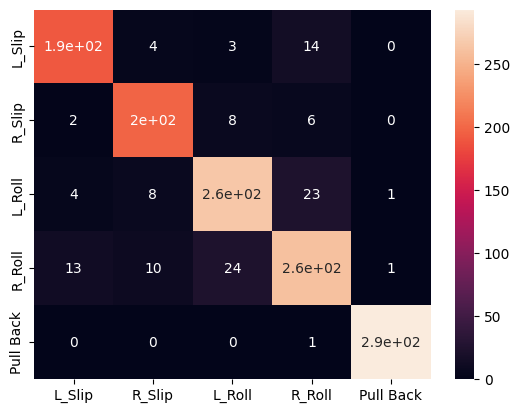

In [12]:
# Print the confusion matrix
EvaluationUtility.plot_confusion_matrix(fitted_model=model, x_test=x_test, y_test=y_test, labels=y.unique())

In [13]:
# Print the cross-validated scores
EvaluationUtility.print_model_cross_validation_scores(fitted_model=model, x_test=x_test, y_test=y_test, cv=10)

Cross Validation Scores
Fold 1: 0.8872180451127819
Fold 2: 0.924812030075188
Fold 3: 0.8872180451127819
Fold 4: 0.9172932330827067
Fold 5: 0.9022556390977443
Fold 6: 0.8947368421052632
Fold 7: 0.8872180451127819
Fold 8: 0.946969696969697
Fold 9: 0.8636363636363636
Fold 10: 0.9393939393939394


In [14]:
# Exporting the model
import joblib
joblib.dump((model, list(x.columns)), 'models/support_vector_machine_model_and_features.pkl')

['models/support_vector_machine_model_and_features.pkl']